In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import functions.tools as tools # Import from ./functions/tools.py


fp = "../data/all-games.tsv"
df = pd.read_csv(fp, sep="\t")
df['timestamp_gallery'] = pd.to_numeric(df['timestamp_gallery'], errors='coerce')
df.head()

,shape,timestamp,timestamp_gallery,next_shape,game_file,shape_matrix,shape_matrix_str
0,1023,16.038,NaN,1023,20120513_091629.txt,"[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]",1111111111
1,1023,17.168,29.65,2 1022,20120513_091629.txt,"[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]",1111111111
2,2 1022,76.165,NaN,4 1020 512,20120513_091629.txt,"[[0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [1, 1, 1, 1, ...",0000000010\n1111111110
3,4 1020 512,79.600,NaN,4 1020 256,20120513_091629.txt,"[[0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [1, 1, 1, 1, ...",0000000100\n1111111100\n1000000000
4,4 1020 256,81.315,NaN,520 1016 512,20120513_091629.txt,"[[0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [1, 1, 1, 1, ...",0000000100\n1111111100\n0100000000


In [13]:
def create_padded_matrix(list_of_lists):

    matrix = np.matrix(list_of_lists)
        
    # Create a 10x10 grid filled with zeros
    grid = np.zeros((10, 10), dtype=int)

    # Fill the grid with the values from the matrix
    grid[:matrix.shape[0], :matrix.shape[1]] = matrix
    return grid

# Single example
decoded_shapes = df.query("game_file == '20120513_091629.txt'")['shape'].apply(lambda x: tools.decode_shape_binaries_str(x))
list_of_lists = decoded_shapes.iloc[5]
grid = create_padded_matrix(list_of_lists)
print(grid)

[[1 0 0 0 0 0 1 0 0 0]
 [1 1 1 1 1 1 1 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [14]:
# For a single game
subset = df.query("game_file == '20120513_091629.txt'")
decoded_shapes = subset['shape'].apply(lambda x: tools.decode_shape_binaries_str(x))
decoded_shapes.apply(create_padded_matrix).sum()

array([[132, 169, 129,  76,  32,  15,   5,   4,   3,   2],
       [190, 220, 216, 122,  63,  40,  17,   5,   2,   0],
       [139, 190, 159,  74,  36,  12,   3,   1,   0,   0],
       [ 94, 148, 142,  56,  18,   4,   1,   0,   0,   0],
       [ 50,  80,  42,  15,   6,   1,   0,   0,   0,   0],
       [  8,  22,   7,   2,   1,   0,   0,   0,   0,   0],
       [  3,   3,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   1,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0]])

<Axes: >

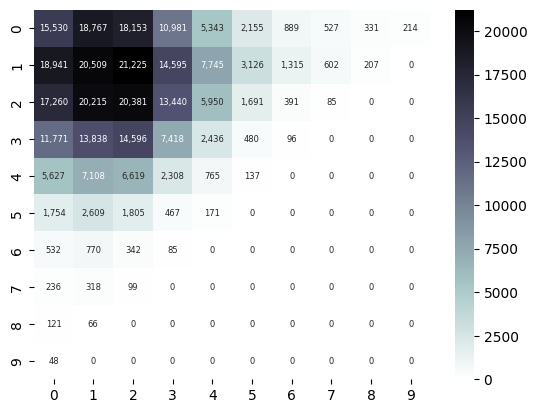

In [15]:
# For ALL games
# subset = df.query("game_file == '20120513_091629.txt'")
decoded_shapes = df['shape'].apply(lambda x: tools.decode_shape_binaries_str(x))
full_weighted_matrix = decoded_shapes.apply(create_padded_matrix).sum()
full_weighted_matrix_norm = full_weighted_matrix / full_weighted_matrix.sum()
sns.heatmap(full_weighted_matrix, cmap="bone_r", annot=True, annot_kws={"size": 6}, fmt=',.0f')


<Axes: >

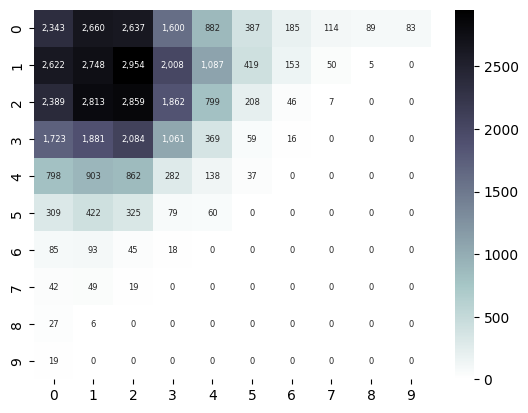

In [17]:
# Create a heatmap of just the gallery shapes (rows that have a value for timestamp_gallery)
gallery_shapes = df.query("timestamp_gallery > 0")['shape'].apply(lambda x: tools.decode_shape_binaries_str(x))
gallery_weighted_matrix = gallery_shapes.apply(create_padded_matrix).sum()
sns.heatmap(gallery_weighted_matrix, cmap="bone_r", annot=True, annot_kws={"size": 6}, fmt=',.0f')


20110530_180623.txt (116, 7)


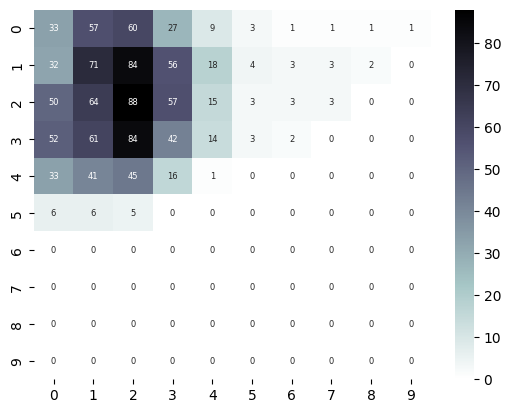

20110530_183814.txt (36, 7)


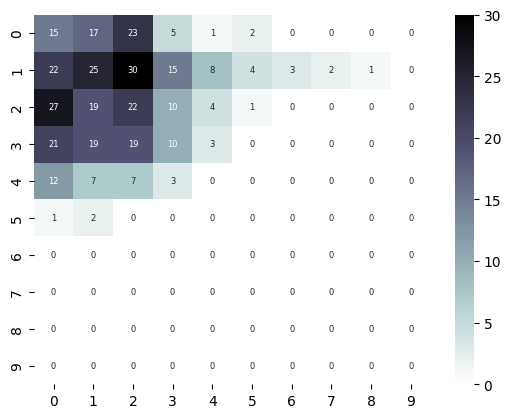

20120315_141948.txt (354, 7)


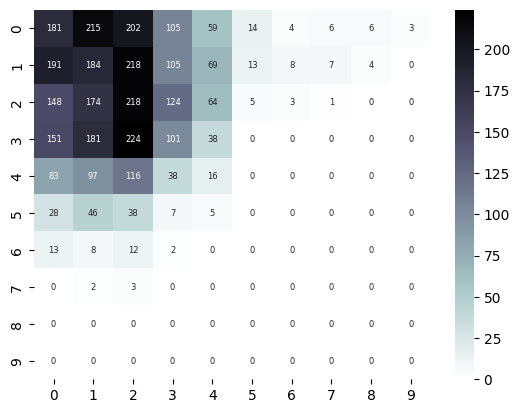

20120315_152932.txt (344, 7)


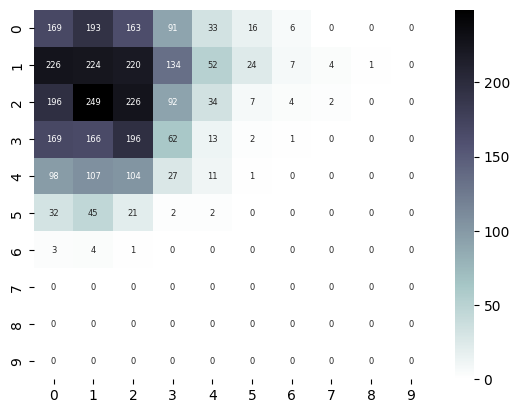

20120320_132515.txt (285, 7)


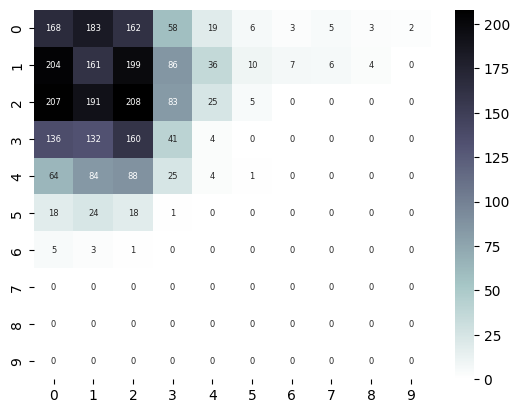

20120320_141008.txt (488, 7)


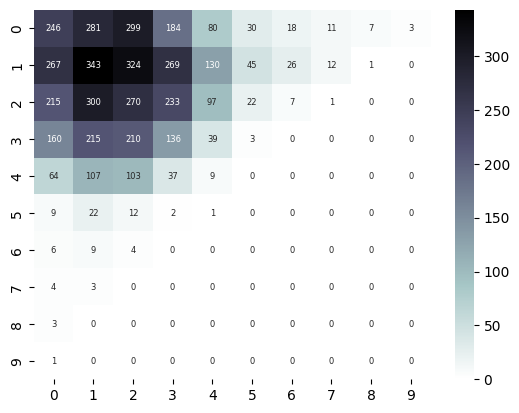

In [7]:

# For each game
idx = 0
for game_file, gdf in df.groupby("game_file"):
    print(game_file, gdf.shape)
    # subset = df.query("game_file == '20120513_091629.txt'")
    decoded_shapes = gdf['shape'].apply(lambda x: tools.decode_shape_binaries_str(x))
    full_weighted_matrix = decoded_shapes.apply(create_padded_matrix).sum()
    sns.heatmap(full_weighted_matrix, cmap="bone_r", annot=True, annot_kws={"size": 6}, fmt=',.0f')
    plt.show()
    idx += 1
    if idx > 5:
        break



## Networks

In [6]:
import networkx as nx

subset = df[df.timestamp_gallery.notnull()]
print(subset.shape)
G = nx.from_pandas_edgelist(subset, 'shape', 'next_shape') #, edge_attr='weight')

(4582, 7)


In [7]:
shape_list = subset['shape'].to_list()

# Convert list to edge list with consecutive elements
def list_to_edges(lst):
    return [(lst[i], lst[i+1]) for i in range(len(lst)-1)]

edges = list_to_edges(shape_list)
# edges

In [8]:
G = nx.DiGraph()
G.add_edges_from(edges)

In [9]:
(G.number_of_nodes(), G.number_of_edges())

(1922, 4345)

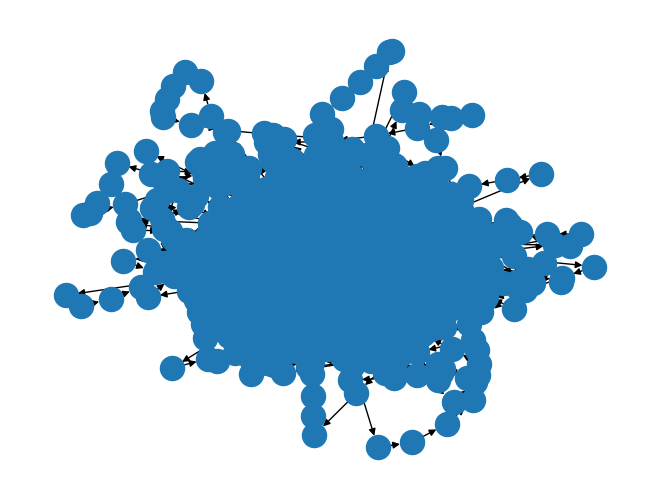

In [10]:
nx.draw(G)

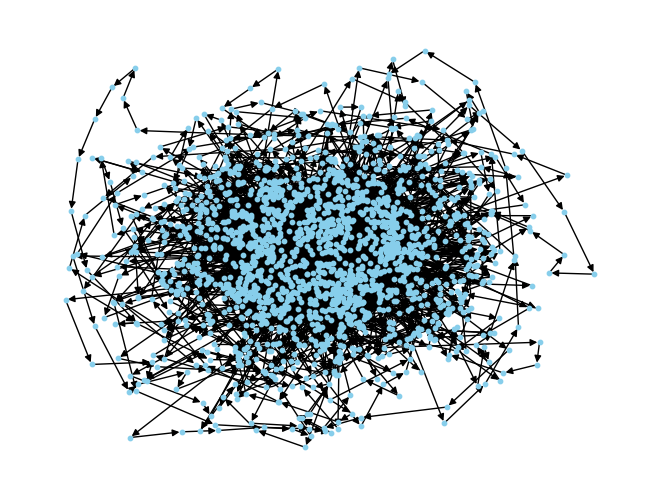

In [11]:
# pos=nx.spring_layout(G))
pos = nx.forceatlas2_layout(G, dissuade_hubs=True)
nx.draw(G, pos, node_color="skyblue", node_size=10)